In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
matplotlib.interactive(True) # extremely useful for interactive development in in ipython, draws immediately without waiting for plt.show
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.widgets import Slider, Button, RadioButtons
import cmath

<IPython.core.display.Javascript object>


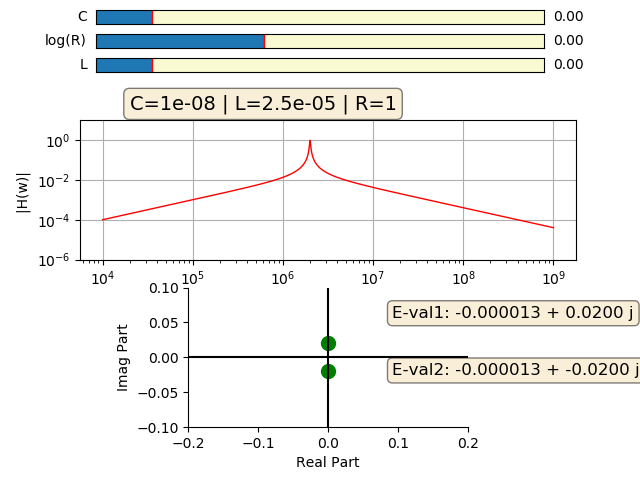

0

In [2]:
"""
==============================================================
Frequency domain solution for HW6, Q7 - Spring 2021
==============================================================

This plots a Bode plot for the RLC series circuit and the eigenvalues.
Figure 1: Log-log plot of |Z(jw)|
Figure 2: Eigenvalues the circuit

"""
## CHANGELOG ##
# 2019/09/22: initial version (code based on fa19hw3)


j=1j # sqrt(-1);

class structtype: # MATLAB-like struct, useful for organization
    pass
# end class structtype

parms = structtype()
parms.R = 1
parms.C = 10e-9 # 10nF
parms.L = 25e-6 # 25uH
parms.f0 = 1/np.sqrt(parms.L*parms.C)/2/np.pi
parms.tauC = parms.R*parms.C
parms.tauL = parms.L/parms.R
parms.alpha = parms.R/(2*parms.L)

def eigval(R,L,C):
    l1 = (-R/2*L) + cmath.sqrt((R/2*L)**2 - (1/L*C))
    l2 = (-R/2*L) - cmath.sqrt((R/2*L)**2 - (1/L*C))
    return l1, l2

parms.lambda1 = eigval(parms.R,parms.L,parms.C)[0]
parms.lambda2 = eigval(parms.R,parms.L,parms.C)[1]
# eval_norm = np.linalg.norm(parms.lambda1)
# parms.lambda1 = parms.lambda1/eval_norm
# parms.lambda2 = parms.lambda2/eval_norm

# you can examine these very easily with vars(parms)
# dir(parms) is also useful

def Z_of_omega(R,L,C): # approximate envelope for vc of t given an initial condition
    """
        Z = sqrt(R**2 + (w*L - 1/(w*C))**2)
    """
    omegas = np.logspace(4,9,1000)
    
    # Series impedance
    # retval = np.array([np.sqrt(R**2+(w*L-(1/(w*C)))**2) for w in omegas])
    
    # Transfer function
    retval = np.array([1/np.sqrt(1+(1/R**2)*(w*L-(1/(w*C)))**2) for w in omegas])

    return retval, omegas

n_cycles = 20
pts_per_cycle = 50
N = pts_per_cycle*n_cycles
ts = 1/parms.f0*n_cycles*np.array(range(0,N+1))/N

Hs, omegas = Z_of_omega(parms.R, parms.L, parms.C) #

fig, axes = plt.subplots(2,1) # like MATLAB's figure()
plt.subplots_adjust(top=0.75) # changes the margins of the plot
ax = axes[0]   # Magnitude
ax2 = axes[-1] # eigenvalues

l, = ax.loglog(omegas, Hs, lw=1, color='red', linestyle='-') # l, makes it a tuple? l of type matplotlib.lines.line2D. this is like the basic matlab plot(...)
ax.set_xlabel('Frequency (Radians)') # 
ax.set_ylabel('|H(w)| ')
ax.set_ylim([1E-6,1E1])
ax.grid()
# plt.title('');

axcolor = 'lightgoldenrodyellow';
axC = plt.axes([0.15, 0.95, 0.7, 0.03], facecolor=axcolor) # this brings up another set of axes in the same figure, below the previous one. The argumens are    presumably xstart, ystart, width, height
#plt.axis('off');
axR = plt.axes([0.15, 0.9, 0.7, 0.03], facecolor=axcolor) # 
axL = plt.axes([0.15, 0.85, 0.7, 0.03], facecolor=axcolor) # 

Cmin = parms.C/7
Cmax = 7*parms.C
Lmin = parms.L/7
Lmax = 7*parms.L
N_C = 100
Rmin = 1e-3
Rmax = 1e5
N_R = 100

#matplotlib sldiers
sC = Slider(axC, 'C', Cmin, Cmax, valinit=parms.C) # this turns sC into a slider. The args are the range. The 'C' is a label
sR = Slider(axR, 'log(R)', np.log10(Rmin), np.log10(Rmax), valinit=np.log10(parms.R)) # , valstep=(np.log10(Rmax)-np.log10(Rmin))/N_R
sL = Slider(axL, 'L', Lmin, Lmax, valinit=parms.L)

textstr = ' | '.join((
    r'C=%g' % (parms.C, ),
    r'L=%g' % (parms.L, ),
    r'R=%g' % (parms.R, ) ))

textlam1 = ' + '.join((
    r'E-val1: %.6f' % (parms.lambda1.real, ),
    r'%.4f j' % (parms.lambda1.imag, )))
textlam2 = ' + '.join((
    r'E-val2: %.6f' % (parms.lambda2.real, ),
    r'%.4f j' % (parms.lambda2.imag, )))
    
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5);
textH = ax.text(.1, 1.185, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
textL1 = ax2.text(.63, -.33, textlam1, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
textL2 = ax2.text(.63, -.74, textlam2, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)



##### Eigenvalue Plot ##############
# ax2 = plt.subplot(212)

# create the unit circle
# uc = patches.Circle((0,0), radius=1, fill=False,
#                     color='black', ls='dashed')
# ax2.add_patch(uc)

# Plot lambda 1
t1, = ax2.plot(parms.lambda1.real, parms.lambda1.imag, 'go', ms=10)

# Plot lambda 2
t2, = ax2.plot(parms.lambda2.real, parms.lambda2.imag, 'go', ms=10)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.axhline(0,color='k')
ax2.axvline(0,color='k')

# set the ticks
r = .1
ax2.axis('scaled') 
ax2.axis([-2*r, 2*r, -r, r])
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imag Part")

def update(val): # function to update the sliding f marker
    C = sC.val
    logR = sR.val
    L = sL.val
    R = 10**logR
    parms.R = R
    parms.C = C
    parms.L = L
    parms.tauC = parms.R*parms.C
    parms.tauL = parms.L/parms.R
    parms.alpha = parms.R/(2*parms.L)
    parms.f0 = 1/(2*np.pi*np.sqrt(parms.L*parms.C))
    parms.lambda1 = eigval(parms.R,parms.L,parms.C)[0]#/eval_norm
    parms.lambda2 = eigval(parms.R,parms.L,parms.C)[1]#/eval_norm
    
    Hs, omegas = Z_of_omega(parms.R, parms.L, parms.C) #
    
    l.set_ydata(Hs)
    ax.relim(True) # recalculate axis bounds
    ax.autoscale_view() # apply
    
    t1.set_data(parms.lambda1.real, parms.lambda1.imag)
    t2.set_data(parms.lambda2.real, parms.lambda2.imag)
    ax2.relim(True) # recalculate axis bounds
    ax2.autoscale_view() # apply


    textstr = ' | '.join((
        r'C=%g' % (parms.C, ),
        r'L=%g' % (parms.L, ),
        r'R=%g' % (parms.R, ) ))

    textlam1 = ' + '.join((
        r'E-val1: %.6f' % (parms.lambda1.real, ),
        r'%.4f j' % (parms.lambda1.imag, )))
    textlam2 = ' + '.join((
        r'E-val2: %.6f' % (parms.lambda2.real, ),
        r'%.4f j' % (parms.lambda2.imag, )))
    
    textH.set_text(textstr)
    textL1.set_text(textlam1)
    textL2.set_text(textlam2)

sC.on_changed(update) # attaching the update function to changes in sfreq slider
sR.on_changed(update) # attaching the update function to changes in sR slider
sL.on_changed(update) # attaching the update function to changes in sR slider

# and now the sliders change the figure